<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Алгоритмы кластеризации (практика)</center></h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [5]:
df = pd.read_csv('food.txt', sep=' ')

In [6]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [7]:
X = df.iloc[:, 1:].values

In [11]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [12]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

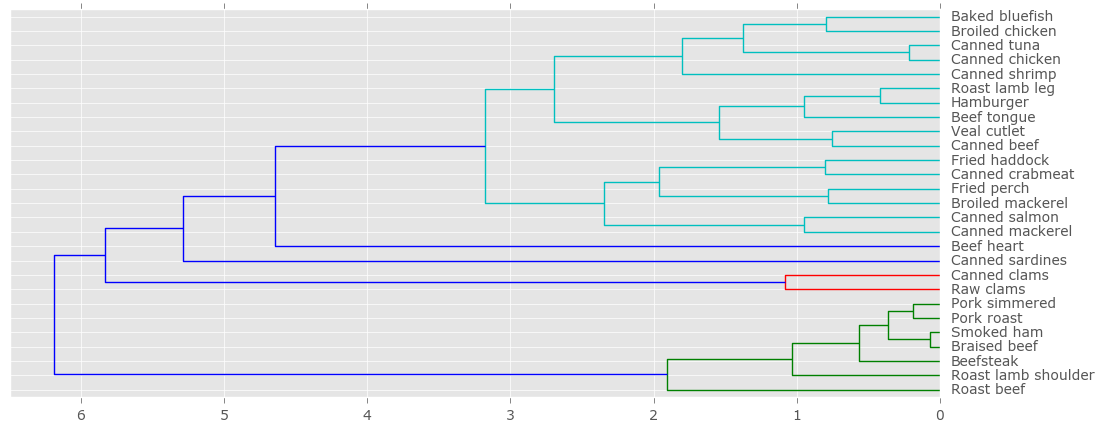

In [25]:
Z = linkage(X, method='complete')
dend = dendrogram(Z, labels=df.loc[:, 'Name'].values, orientation='left')

In [36]:
df.loc[:, 'cluster'] = fcluster(Z, 5, criterion='maxclust')

In [39]:
for i, group in df.groupby('cluster'):
    print '= cluster %i =' % i
    print group.mean()
    
    print '=' * 10

= cluster 1 =
Energy     352.857143
Protein     18.571429
Fat         30.142857
Calcium      8.714286
Iron         2.414286
cluster      1.000000
dtype: float64
= cluster 2 =
Energy     57.5
Protein     9.0
Fat         1.0
Calcium    78.0
Iron        5.7
cluster     2.0
dtype: float64
= cluster 3 =
Energy     167.1875
Protein     19.8125
Fat          8.5625
Calcium     36.8125
Iron         1.7250
cluster      3.0000
dtype: float64
= cluster 4 =
Energy     160.0
Protein     26.0
Fat          5.0
Calcium     14.0
Iron         5.9
cluster      4.0
dtype: float64
= cluster 5 =
Energy     180.0
Protein     22.0
Fat          9.0
Calcium    367.0
Iron         2.5
cluster      5.0
dtype: float64


# Европейcкие языки

Загризите данные из файла `'languages.txt'` о произношении различных слов на европейских языках.

Используйте расстояние Левенштейна, чтобы рассчитать близость языков по данным словам

Для этого вам надо написать собственную функцию, которая принимает на вход вектора двух объектов и считает расстояние между ними.

Как в дальнейшем использовать вашу функцию можно посмотреть [здесь](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) в п.23 (если вы будете использовать `scipy`)  или передать на вход в `AgglomerativeClustering` в `sklearn`.

In [ ]:
def classic_levenshtein(string_1, string_2):
    '''
    Расстояние Левенштейна
    '''
    len_1 = len(string_1)
    len_2 = len(string_2)
    cost = 0

    if len_1 and len_2 and string_1[0] != string_2[0]:
        cost = 1

    if len_1 == 0:
        return len_2
    elif len_2 == 0:
        return len_1
    else:
        return min(
            classic_levenshtein(string_1[1:], string_2) + 1,
            classic_levenshtein(string_1, string_2[1:]) + 1,
            classic_levenshtein(string_1[1:], string_2[1:]) + cost,
)

In [ ]:
classic_levenshtein('мгу', 'вмк')

In [ ]:
## Your Code Here